<a href="https://colab.research.google.com/github/nadakhelif/CNN_tp_deep_learning/blob/main/TP4_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nada Khelif -  Chaima bouhlel  - Ahmed Frikha

## Importation des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D, MaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding , GRU
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

## Importation du dataset

In [ ]:
movie_reviews = pd.read_csv('IMDB Dataset.csv')
movie_reviews.shape

(50000, 2)

In [ ]:
movie_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


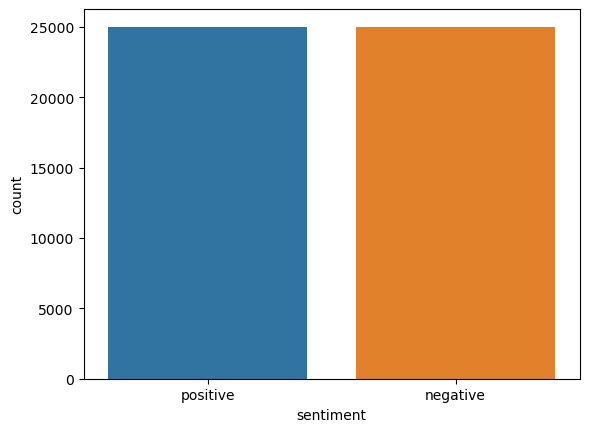

In [ ]:
sns.countplot(data = movie_reviews , x='sentiment')
plt.show()

Notre dataset est bien équilibré

In [ ]:
print(movie_reviews['review'][3])
print(movie_reviews['sentiment'][3])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
negative


Il est observé que les balises HTML sont présentes dans nos données et qu'elles sont inutiles. Par conséquent, il est nécessaire de les supprimer.

## Prétraitement de données

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
#A regural expression that matches all html tags
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    #remove hhtml tags from the variable text
    return TAG_RE.sub('', text)


Dans le code précédent, les expressions régulières ont été mises en œuvre pour trier les données en éliminant les éléments superflus tels que les balises HTML, les signes de ponctuation, les chiffres et les espaces.






In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))


In [ ]:
print(X[3])

Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them 


La base de données a été correctement nettoyée.






In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

## La couche de l'embedding

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
print(X_train[3])

[8, 1547, 247, 2628, 5, 443, 4385, 1871, 14, 30, 31, 1062, 390, 4, 968, 119, 22, 118, 4197, 29, 44, 3, 1, 17, 78, 118, 4125, 122, 502, 18, 2, 31, 37, 555, 4, 25, 2839, 1, 2628, 221, 77, 4, 170, 1663, 777, 57, 59, 924, 7, 44, 1974, 950, 1164, 3355, 57, 376, 754, 264, 30, 1318, 1746, 1326, 31, 376, 529, 1135, 491, 19, 4, 736, 745, 701, 39, 3, 1, 1320, 3, 251, 7, 8, 407, 1, 103, 2654, 1749, 3813, 1420, 3515, 7, 1, 125, 46, 130, 147, 749, 9, 8, 16, 266, 52, 1975, 3, 1, 3, 3626, 13, 1, 57, 6, 3735, 7, 430, 752, 2, 9, 6, 5, 1428, 4, 1563, 2543, 51, 1, 2037, 15, 610, 94, 1064, 276, 3, 2, 36, 1415, 14, 57, 2990, 2628, 63, 29, 87, 428, 332, 3432]


In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

92547


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:],dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [ ]:
print(len(embeddings_dictionary))


400000


In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
print(len(embedding_matrix))

92547


## A. Classification avec un simple réseau de neurones

In [ ]:
model = Sequential()

# Ajout de la couche Embedding
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# Ajout de la couche Flatten
model.add(Flatten())

# Ajout de la couche Dense
model.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Entraînement du modèle
history=model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)


Epoch 1/6
250/250 [==============================] - 2s 5ms/step - loss: 0.6026 - acc: 0.6746 - val_loss: 0.5512 - val_acc: 0.7134
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4940 - acc: 0.7615 - val_loss: 0.5515 - val_acc: 0.7204
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4576 - acc: 0.7888 - val_loss: 0.5176 - val_acc: 0.7423
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4366 - acc: 0.7988 - val_loss: 0.5240 - val_acc: 0.7451
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4213 - acc: 0.8081 - val_loss: 0.5284 - val_acc: 0.7410
Epoch 6/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4108 - acc: 0.8138 - val_loss: 0.6144 - val_acc: 0.7115


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.6192 - acc: 0.7158
Test Score: 0.6191900968551636
Test Accuracy: 0.7157999873161316


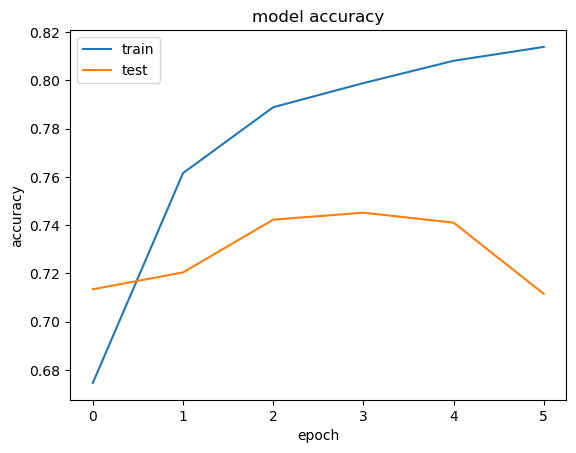

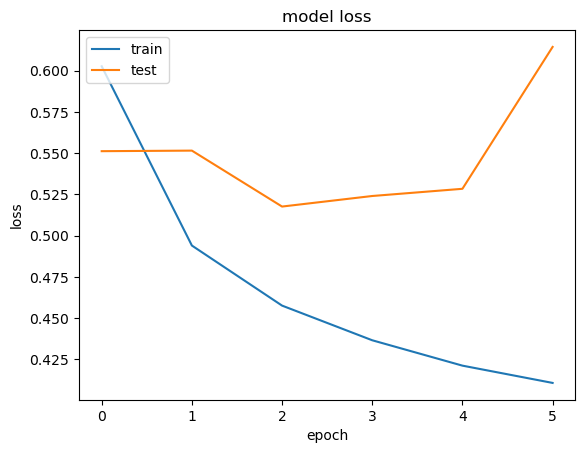

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Il a été observé qu'il y a du sur-apprentissage, en particulier vers la fin de l'époque 1, où laccuracy du test commence à diminuer tandis que celle de l'entraînement continue d'augmenter fortement.
comme solution je propose early stopping a lepoch 3







## B. Classification avec un réseau de neurones convolutionnel

In [ ]:
# Créer un modèle séquentiel
model = Sequential()

# Ajouter une couche Embedding
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# Ajouter une couche Conv1D
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# Ajouter une couche MaxPooling1D
model.add(GlobalMaxPooling1D())

# Ajouter une couche Dense
model.add(Dense(units=1, activation='sigmoid'))

# Compiler le modèle avec les paramètres donnés
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Entraîner le modèle avec les paramètres donnés
history = model.fit(X_train, y_train , epochs=6, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/6
250/250 [==============================] - 9s 35ms/step - loss: 0.4984 - acc: 0.7548 - val_loss: 0.4100 - val_acc: 0.8098
Epoch 2/6
250/250 [==============================] - 9s 35ms/step - loss: 0.3715 - acc: 0.8353 - val_loss: 0.3870 - val_acc: 0.8227
Epoch 3/6
250/250 [==============================] - 9s 35ms/step - loss: 0.3153 - acc: 0.8693 - val_loss: 0.3542 - val_acc: 0.8391
Epoch 4/6
250/250 [==============================] - 9s 36ms/step - loss: 0.2779 - acc: 0.8887 - val_loss: 0.3563 - val_acc: 0.8406
Epoch 5/6
250/250 [==============================] - 10s 39ms/step - loss: 0.2442 - acc: 0.9063 - val_loss: 0.3421 - val_acc: 0.8495
Epoch 6/6
250/250 [==============================] - 9s 35ms/step - loss: 0.2176 - acc: 0.9204 - val_loss: 0.3521 - val_acc: 0.8460


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3505 - acc: 0.8461
Test Score: 0.3504735827445984
Test Accuracy: 0.8460999727249146


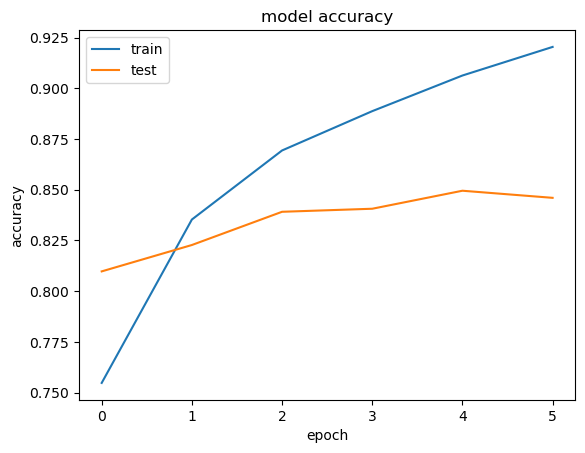

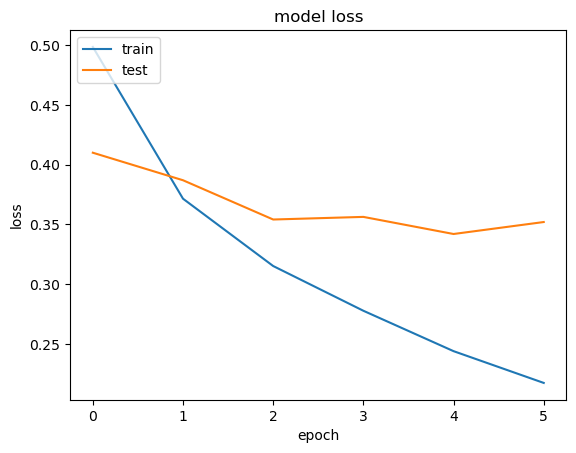

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

On constate aussi un phénomène de sur-apprentissage

## C. Classification avec un réseau de neurones récurrent (LSTM)

In [ ]:
# Créer le modèle
model = Sequential()

# Ajouter la couche Embedding
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

# Ajouter la couche LSTM
model.add(LSTM(units=128))

# Ajouter la couche Dense
model.add(Dense(units=1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 67s 262ms/step - loss: 0.5436 - acc: 0.7172 - val_loss: 0.3796 - val_acc: 0.8372
Epoch 2/6
250/250 [==============================] - 63s 251ms/step - loss: 0.3378 - acc: 0.8559 - val_loss: 0.3297 - val_acc: 0.8630
Epoch 3/6
250/250 [==============================] - 64s 254ms/step - loss: 0.2831 - acc: 0.8834 - val_loss: 0.3415 - val_acc: 0.8566
Epoch 4/6
250/250 [==============================] - 63s 253ms/step - loss: 0.2520 - acc: 0.9013 - val_loss: 0.3470 - val_acc: 0.8591
Epoch 5/6
250/250 [==============================] - 64s 256ms/step - loss: 0.2321 - acc: 0.9088 - val_loss: 0.3384 - val_acc: 0.8577
Epoch 6/6
250/250 [==============================] - 73s 293ms/step - loss: 0.2076 - acc: 0.9212 - val_loss: 0.3580 - val_acc: 0.8608


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 9s 28ms/step - loss: 0.3353 - acc: 0.8699
Test Score: 0.33530059456825256
Test Accuracy: 0.8698999881744385


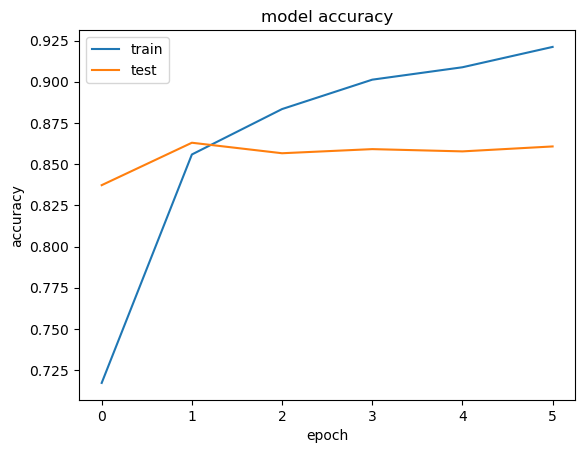

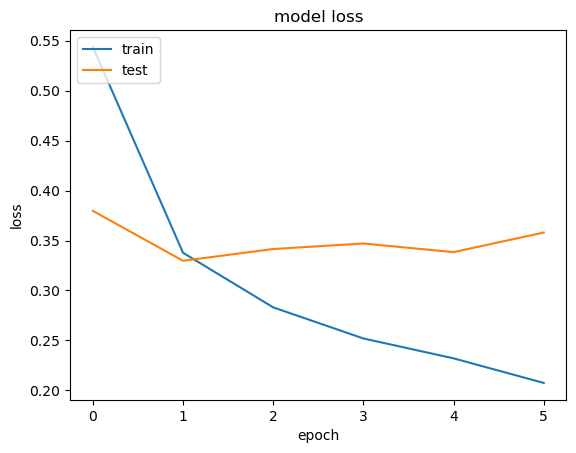

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

lstm et cnn ont meme resultat

In [ ]:
instance =X[50]
print(instance)
print(y[50])

Return to the th Chamber is one of those classic Kung Fu movies which Shaw produces back in the and whose genre is equivalent to the spaghetti westerns of Hollywood and the protagonist Gordon Liu the counterpart to the western Clint Eastwood Digitally remastered and new print made for the Fantastic Film Fest this is Presented in Shaw Scope just like the good old days This film is simple story of good versus evil told in acts which more or less sums up the narrative of martial arts films in that era Act One sets up the premise Workers in dye mill of small village are unhappy with their lot having their wages cut by by incoming manchu gangsters They can do much about their exploitation because none of them are martial arts skilled to take on the gangsters and their boss At first they had minor success in getting Liu to impersonate highly skilled Shaolin monk one of the best comedy sequences but their rouse got exposed when they pushed the limit of credibility by impersonating one too man

In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

prediction = model.predict(instance)

if(prediction>0.5):
    print('The instance is positive')
else: print('the instance is negative')

1/1 [==============================] - 0s 473ms/step
The instance is positive


La prédiction est correcte

# Compte Rendu

Pour commencer, nous allons créer une fonction pour chaque modèle (LSTM, GRU et RNN+CNN) qui prendra en entrée les données d'entraînement et de test (X_train, y_train, X_test, y_test) et qui renverra la précision (accuracy) obtenue lors du test.

In [ ]:
#LSTM
def train_and_evaluate_LTSM_model(embedding_matrix_method,embedding_dim=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_method], input_length=maxlen))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)
    score = model.evaluate(X_test, y_test, verbose=1)
    return score[1]


In [ ]:
#GRU
def train_and_evaluate_GRU_model(embedding_matrix_method, embedding_dim=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_method], input_length=maxlen))
    model.add(GRU(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    score= model.evaluate(X_test, y_test)
    return score[1]

In [ ]:
#RNN + CNN
from keras.layers import Reshape
def train_and_evaluate_RNN_CNN_model(embedding_matrix_method, embedding_dim=100):
    # define the model
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_method], input_length=maxlen, trainable=False))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Reshape((-1, 128)))
    model.add(GRU(units=128))
    model.add(Dense(units=1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.2, )

    # evaluate the model on the test set
    score= model.evaluate(X_test, y_test)
    return score[1]

Maintenant on va définir l'embedding_matrix_method à utiliser pour chaque méthod d"Embedding : Glove, Wor2vec, Fasttext et Tf-idf

In [ ]:
embedding_matrix_glove= embedding_matrix
embedding_dim_glove=100

In [ ]:
#Word2vec
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=X, window=5, min_count=1)

In [ ]:
embedding_matrix_w2v = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in enumerate(w2v_model.wv.key_to_index):
        embedding_matrix_w2v[i] = w2v_model[word]

In [ ]:
from gensim.models import FastText
fasttext_model= FastText(sentences=X, min_count=1 , window=5)

In [ ]:
# get the embedding matrix
embedding_matrix_fasttext = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = fasttext_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(X)
vocab = tfidf.vocabulary_
idf = tfidf.idf_
embedding_matrix_tfidf = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in vocab:
        tfidf_weight = idf[vocab[word]]
        embedding_matrix_tfidf[i] = tfidf.transform([word]).toarray()[0][:100] * tfidf_weight
train_and_evaluate_LTSM_model(embedding_matrix_glove), train_and_evaluate_GRU_model(embedding_matrix_glove),

In [ ]:
results=pd.DataFrame()
results.index = ['LTSM', 'GRU', 'RNN + CNN']
results['Glove']= [ train_and_evaluate_LTSM_model(embedding_matrix_glove), train_and_evaluate_GRU_model(embedding_matrix_glove), train_and_evaluate_RNN_CNN_model(embedding_matrix_glove)]
results

Epoch 1/6
250/250 [==============================] - 88s 346ms/step - loss: 0.4937 - acc: 0.7524 - val_loss: 0.3743 - val_acc: 0.8344
Epoch 2/6
250/250 [==============================] - 87s 347ms/step - loss: 0.3298 - acc: 0.8584 - val_loss: 0.3272 - val_acc: 0.8606
Epoch 3/6
250/250 [==============================] - 82s 327ms/step - loss: 0.2886 - acc: 0.8826 - val_loss: 0.3232 - val_acc: 0.8624
Epoch 4/6
250/250 [==============================] - 86s 344ms/step - loss: 0.2604 - acc: 0.8963 - val_loss: 0.3207 - val_acc: 0.8630
Epoch 5/6
250/250 [==============================] - 92s 366ms/step - loss: 0.2324 - acc: 0.9074 - val_loss: 0.3247 - val_acc: 0.8633
Epoch 6/6
313/313 [==============================] - 11s 36ms/step - loss: 0.3425 - acc: 0.8663
Epoch 1/10
250/250 [==============================] - 36s 138ms/step - loss: 0.5324 - acc: 0.7099 - val_loss: 0.3581 - val_acc: 0.8457
Epoch 2/10
250/250 [==============================] - 40s 159ms/step - loss: 0.3176 - acc: 0.8653 -

,Glove
LTSM,0.8663
GRU,0.8520
RNN + CNN,0.8346


In [ ]:
results['Word2vec']=[train_and_evaluate_LTSM_model(embedding_matrix_w2v), train_and_evaluate_GRU_model(embedding_matrix_w2v),  train_and_evaluate_RNN_CNN_model(embedding_matrix_w2v)]
results

Epoch 1/6
250/250 [==============================] - 60s 235ms/step - loss: 0.4108 - acc: 0.8080 - val_loss: 0.3462 - val_acc: 0.8500
Epoch 2/6
250/250 [==============================] - 59s 235ms/step - loss: 0.3009 - acc: 0.8783 - val_loss: 0.3349 - val_acc: 0.8530
Epoch 3/6
250/250 [==============================] - 58s 232ms/step - loss: 0.2654 - acc: 0.8933 - val_loss: 0.3465 - val_acc: 0.8494
Epoch 4/6
250/250 [==============================] - 60s 241ms/step - loss: 0.2312 - acc: 0.9069 - val_loss: 0.3616 - val_acc: 0.8410
Epoch 5/6
250/250 [==============================] - 65s 261ms/step - loss: 0.2071 - acc: 0.9189 - val_loss: 0.3800 - val_acc: 0.8397
Epoch 6/6
313/313 [==============================] - 9s 29ms/step - loss: 0.3977 - acc: 0.8445
Epoch 1/10
250/250 [==============================] - 38s 144ms/step - loss: 0.4682 - acc: 0.7638 - val_loss: 0.3525 - val_acc: 0.8489
Epoch 2/10
250/250 [==============================] - 35s 138ms/step - loss: 0.3036 - acc: 0.8746 - 

,Glove,Word2vec
LTSM,0.8663,0.8445
GRU,0.8520,0.8389
RNN + CNN,0.8346,0.4961


In [ ]:
results['Fasttext']=[train_and_evaluate_LTSM_model(embedding_matrix_fasttext), train_and_evaluate_GRU_model(embedding_matrix_fasttext),  train_and_evaluate_RNN_CNN_model(embedding_matrix_fasttext)]
results

Epoch 1/6
250/250 [==============================] - 77s 302ms/step - loss: 0.4185 - acc: 0.8005 - val_loss: 0.3373 - val_acc: 0.8524
Epoch 2/6
250/250 [==============================] - 74s 297ms/step - loss: 0.2938 - acc: 0.8779 - val_loss: 0.3365 - val_acc: 0.8539
Epoch 3/6
250/250 [==============================] - 74s 295ms/step - loss: 0.2721 - acc: 0.8891 - val_loss: 0.3555 - val_acc: 0.8503
Epoch 4/6
250/250 [==============================] - 73s 293ms/step - loss: 0.2321 - acc: 0.9068 - val_loss: 0.3809 - val_acc: 0.8520
Epoch 5/6
250/250 [==============================] - 73s 294ms/step - loss: 0.2041 - acc: 0.9188 - val_loss: 0.3993 - val_acc: 0.8430
Epoch 6/6
313/313 [==============================] - 11s 37ms/step - loss: 0.3948 - acc: 0.8544
Epoch 1/10
250/250 [==============================] - 36s 138ms/step - loss: 0.4732 - acc: 0.7590 - val_loss: 0.3490 - val_acc: 0.8491
Epoch 2/10
250/250 [==============================] - 35s 139ms/step - loss: 0.3066 - acc: 0.8751 -

,Glove,Word2vec,Fasttext
LTSM,0.8663,0.8445,0.8544
GRU,0.8520,0.8389,0.8469
RNN + CNN,0.8346,0.4961,0.6915


In [ ]:
results['Tf-idf']=[train_and_evaluate_LTSM_model(embedding_matrix_tfidf), train_and_evaluate_GRU_model(embedding_matrix_tfidf),  train_and_evaluate_RNN_CNN_model(embedding_matrix_tfidf)]
results

Epoch 1/6
250/250 [==============================] - 71s 277ms/step - loss: 0.4215 - acc: 0.8054 - val_loss: 0.3585 - val_acc: 0.8450
Epoch 2/6
250/250 [==============================] - 67s 270ms/step - loss: 0.2983 - acc: 0.8770 - val_loss: 0.3702 - val_acc: 0.8524
Epoch 3/6
250/250 [==============================] - 67s 267ms/step - loss: 0.2684 - acc: 0.8912 - val_loss: 0.3541 - val_acc: 0.8496
Epoch 4/6
250/250 [==============================] - 66s 264ms/step - loss: 0.2421 - acc: 0.9024 - val_loss: 0.3821 - val_acc: 0.8447
Epoch 5/6
250/250 [==============================] - 66s 264ms/step - loss: 0.2080 - acc: 0.9189 - val_loss: 0.4241 - val_acc: 0.8326
Epoch 6/6
313/313 [==============================] - 10s 32ms/step - loss: 0.3908 - acc: 0.8369
Epoch 1/10
250/250 [==============================] - 35s 136ms/step - loss: 0.4553 - acc: 0.7782 - val_loss: 0.3565 - val_acc: 0.8508
Epoch 2/10
250/250 [==============================] - 33s 134ms/step - loss: 0.3041 - acc: 0.8752 -

,Glove,Word2vec,Fasttext,Tf-idf
LTSM,0.8663,0.8445,0.8544,0.8369
GRU,0.8520,0.8389,0.8469,0.8368
RNN + CNN,0.8346,0.4961,0.6915,0.4962


Ces résultats montrent que les modèles LSTM et GRU sont globalement plus performants que le modèle RNN + CNN sur cet ensemble de données, quel que soit l'algorithme d'embedding utilisé. E
n outre, les embeddings pré-entraînés donnent des résultats nettement supérieurs à l'utilisation de la pondération tf-idf.

Parmi les différents algorithmes d'embedding, GloVe semble être le plus performant.